递归问题注意：
1. 想想如何把问题转为递归子问题
2. 找到退出条件
3. 用一个元素最少的例子想想代码怎么写

递归问题常见的几类：
1. 求阶乘（太简单，不做笔记）
2. 斐波拉契数列
3. 全排列问题
4. 汉诺塔问题

# 全排列问题:
比如：集合{ 1,2,3}的全排列为：
{ 1 2 3} 
{ 1 3 2 }
{ 2 1 3 }
{ 2 3 1 }
{ 3 2 1 }
{ 3 1 2 }

1. 递归思想：取出数组第一个元素，剩下n-1个继续做全排列。或者是交换第一个元素和其他元素的位置，后面n-1个元素继续做全排列。
 - 方法一（递归）：取出数组第一个元素（需要遍历取完所有元素），剩下n-1个继续做全排列 
 - 方法二（递归）：交换第一个元素和其他元素的位置，后面n-1个元素继续做全排列。

2. 非递归方法：后面详细介绍

### 递归方法一：取出数组第一个元素（需要遍历取完所有元素），剩下n-1个继续做全排列。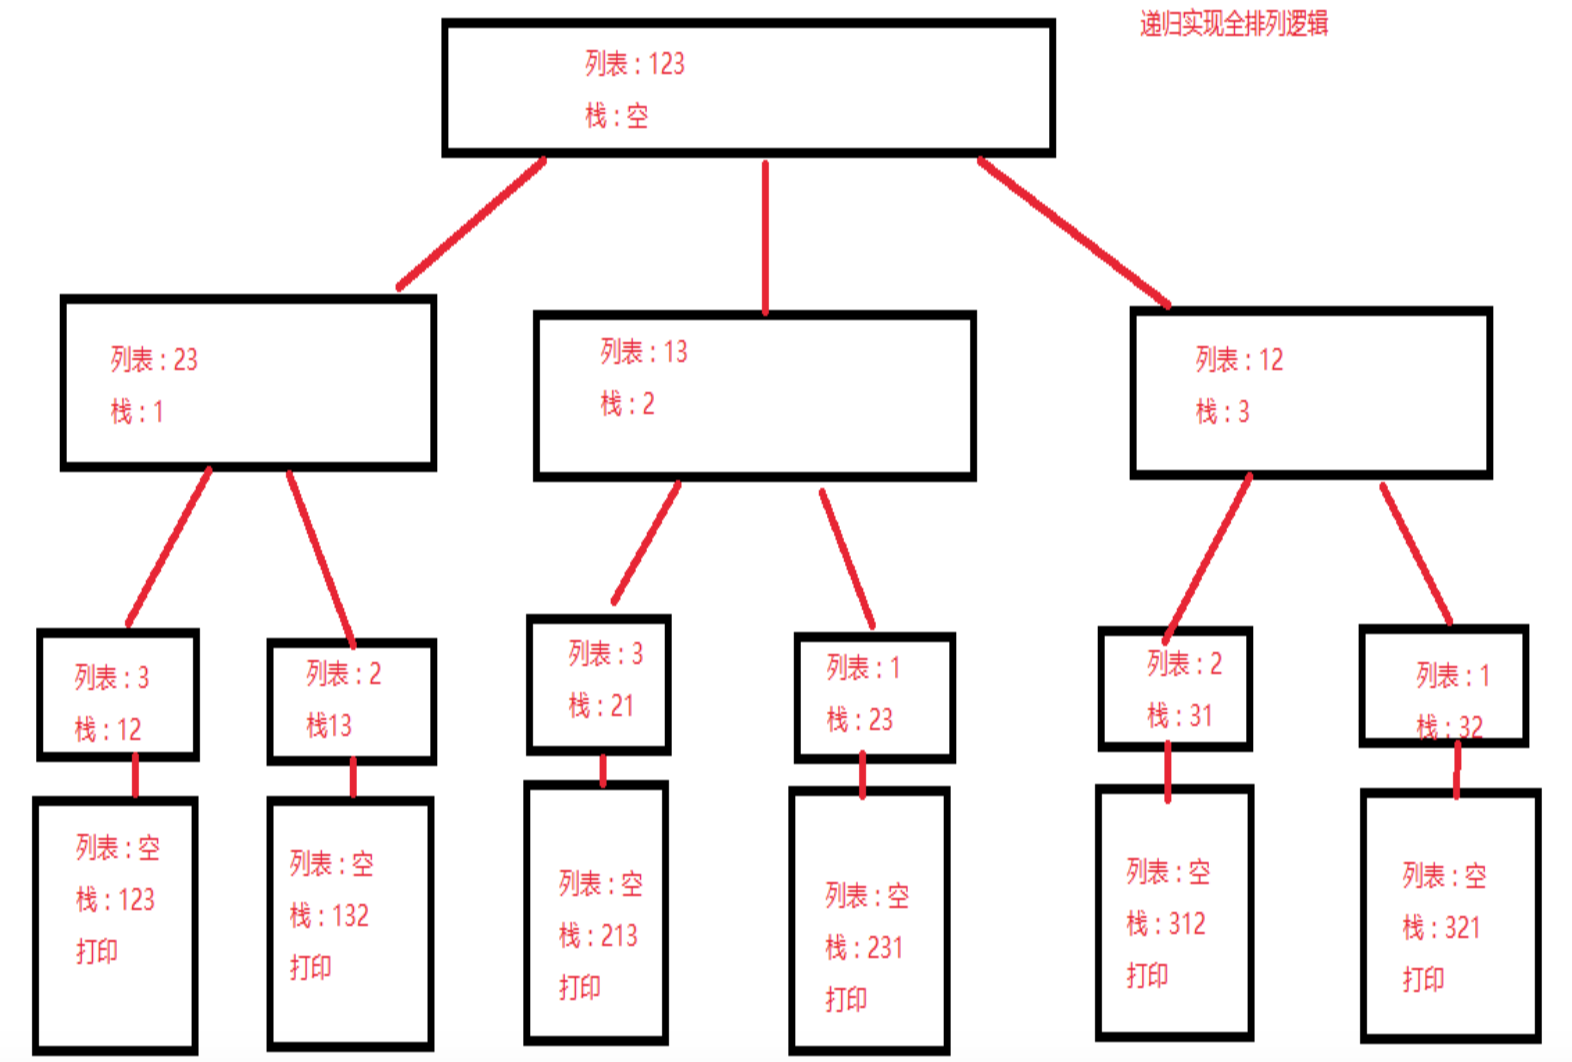
具体可参考：https://www.cnblogs.com/huxianglin/p/5906510.html

In [98]:
# 博主写的代码
# def perm(list,stack):
#     if not list:
#         print(stack)  # 到树的最后，输出结果
#     else:  # 没有到树的叶子节点的时候，使用递归继续往下找。
#         for i in range(len(list)):
#             stack.append(list[i])
#             del list[i]
#             perm(list,stack)
#             list.insert(i,stack.pop())

# lists=[1,2,3]
# stack=[]
# perm(lists,stack)


##自己写的代码：
def solve(my_list,result_list):
    if len(my_list)==1: 
        result_list.append(my_list[0])
        print(result_list)
        result_list.pop()
    else:
        for i in range(len(my_list)):
            result_list.append(my_list[i])
            my_list.pop(i)
            solve(my_list,result_list)
            my_list.insert(i,result_list.pop()) ##注意my_list是列表可变对象、
                                                ##在递归中作为参数的时候可以当作全局变量
                                                ##在这里递归返回上一级的时候需要复原
                                                ##只能使用result_list.pop()复原，
                                                ##不能使用my_list[i]，因为my_list已经修改了                                            
lists=[1,2,3]
result_list=[]
perm(lists,result_list)

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 1, 2]
[3, 2, 1]


### 递归方法二：交换第一个元素和其他元素的位置，后面n-1个元素继续做全排列。
参考视频：https://www.bilibili.com/video/av9830088?t=732

参考博客：https://blog.csdn.net/zhoufen12345/article/details/53560099

In [101]:
def solve(my_list,begin,end):
    if begin == end -1 :
        print(my_list)
    else:
        for i in range(begin,end):
            my_list[begin],my_list[i] = my_list[i],my_list[begin]
            solve(my_list,begin+1,end)
            my_list[i],my_list[begin] = my_list[begin],my_list[i]
            ##begin是整型不可变变量，在递归中作为参数传递的时候可以当做局部变量，回到上一递归状态时值会自动变化

my_list = [1,2,3]
solve(my_list,0,len(my_list))

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 2, 1]
[3, 1, 2]


### 非递归方式：
以'123'作为例子介绍：
步骤为：
1. 第0号元素和后面所有单个元素交换一下顺序，得到列表my_list = ['123', '213', '321'],需要2次遍历
2. 在my_list中第1号元素和后面所有元素交换下顺序，得到my_list = ['123', '213', '321'，'132', '231', '312'] 需要1次遍历

注意：总共需要步骤遍历数：n-1

In [107]:
def solve(strs):
    num = len(strs)
    my_list = [strs]
    for i in range(num-1):
        temp_list = []
        for j in my_list:
            for k in range(num-i-1):
                temp = list(j)
                temp[i],temp[i+k+1]=temp[i+k+1],temp[i]
                temp = ''.join(temp)
                temp_list.append(temp)
        my_list = my_list+temp_list
    return my_list
solve('123') 

['123', '213', '321', '132', '231', '312']

## 斐波拉契数列

In [129]:
#递归方法：
def f(n):
    if n==0 or n==1 : return 1
    return f(n-2)+f(n-1)
my_list = []
for i in range(10):
    my_list.append(f(i))
my_list

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [130]:
#非递归方法：
my_list = []
for i in range(10):
    if i ==0 or i==1 :
        my_list.append(1)
    else:
        my_list.append(my_list[i-2]+my_list[i-1])
my_list

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

# 汉诺塔问题
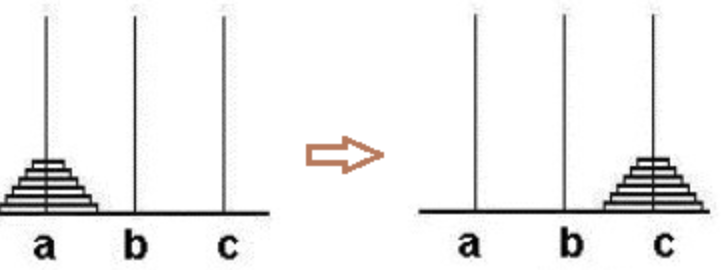
用最少的步数把A柱上的盘子挪到C柱上面，B是中间过渡杆

解决步骤：
1. 把n-1个盘子挪到B
2. 把第n个盘子挪到C
3. 把n-1个盘子挪到C（不需要再挪回A柱了）

In [132]:
def hanoi(n,a,b,c):
    if n==1 :
        print('将盘子从{}挪至{}盘'.format(a,c))
    else:
        hanoi(n-1,a,c,b)
        print('将盘子从{}挪至{}盘'.format(a,c))
        hanoi(n-1,b,a,c)
hanoi(3,'A','B','C')

将盘子从A挪至C盘
将盘子从A挪至B盘
将盘子从C挪至B盘
将盘子从A挪至C盘
将盘子从B挪至A盘
将盘子从B挪至C盘
将盘子从A挪至C盘
